Modules and functions import, loading dataset. Output first 10 lines

In [118]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn, pandas, numpy, matplotlib.pyplot as plt
titanic = seaborn.load_dataset('titanic')
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


Dataset describe. Data preprocessing. Dividing data to test and train selections

In [66]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Preparing data. Filling gaps in columns, encoding categorical variables

In [119]:
print(f"Gaps in age column: {titanic['age'].isnull().sum()}, Gaps in embarked column: {titanic['embarked'].isnull().sum()}")

titanic['age'] = titanic['age'].fillna(titanic['age'].mean().round(1))
titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode()[0])

print(f"Gaps in age column: {titanic['age'].isnull().sum()}, Gaps in embarked column: {titanic['embarked'].isnull().sum()}")

titanic_encoded = pandas.get_dummies(titanic, columns = ['sex', 'embarked'], drop_first=True, dtype=int)
titanic_encoded['family_size'] = titanic['sibsp'] + titanic['parch']
titanic_encoded.head(10)

Gaps in age column: 177, Gaps in embarked column: 2
Gaps in age column: 0, Gaps in embarked column: 0


,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,sex_male,embarked_Q,embarked_S,family_size
0,0,3,22.0,1,0,7.2500,Third,man,True,NaN,Southampton,no,False,1,0,1,1
1,1,1,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False,0,0,0,1
2,1,3,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,yes,True,0,0,1,0
3,1,1,35.0,1,0,53.1000,First,woman,False,C,Southampton,yes,False,0,0,1,1
4,0,3,35.0,0,0,8.0500,Third,man,True,NaN,Southampton,no,True,1,0,1,0
5,0,3,29.7,0,0,8.4583,Third,man,True,NaN,Queenstown,no,True,1,1,0,0
6,0,1,54.0,0,0,51.8625,First,man,True,E,Southampton,no,True,1,0,1,0
7,0,3,2.0,3,1,21.0750,Third,child,False,NaN,Southampton,no,False,1,0,1,4
8,1,3,27.0,0,2,11.1333,Third,woman,False,NaN,Southampton,yes,False,0,0,1,2
9,1,2,14.0,1,0,30.0708,Second,child,False,NaN,Cherbourg,yes,False,0,0,0,1


Dataset dividing to test and train selections. Logistic regression, desicion tree, random forest models

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Модель Логістична регресія
Точність: 0.8100558659217877
Перехресна оцінка(точність):  0.8181783943255289
Матриця плутанини:
 [[90 15]
 [19 55]]
Звіт класифікації:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



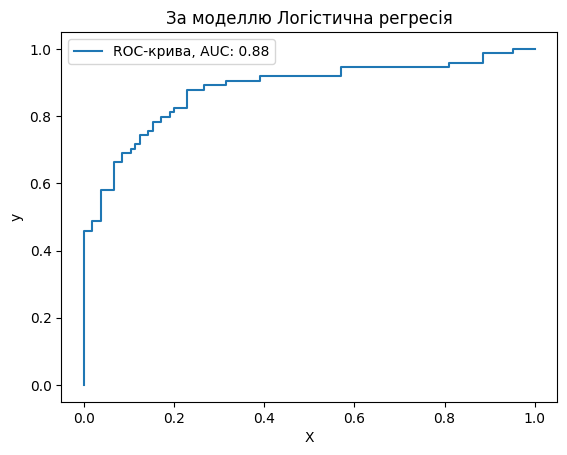

Модель Дерево рішень
Точність: 0.770949720670391
Перехресна оцінка(точність):  0.7890465130876907
Матриця плутанини:
 [[82 23]
 [18 56]]
Звіт класифікації:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80       105
           1       0.71      0.76      0.73        74

    accuracy                           0.77       179
   macro avg       0.76      0.77      0.77       179
weighted avg       0.77      0.77      0.77       179



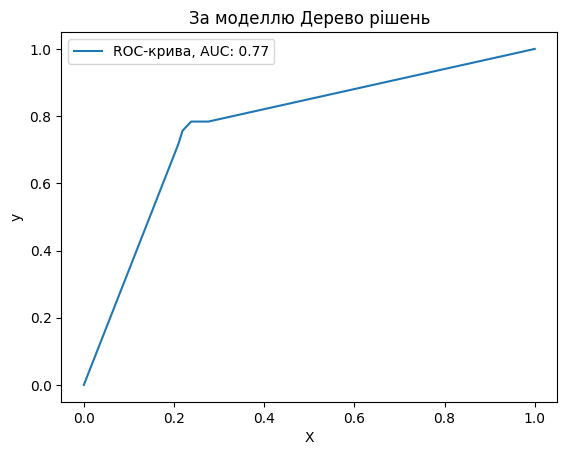

Модель Випадковий ліс
Точність: 0.8268156424581006
Найкращі параметри для випадкового лісу: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 120}
Матриця плутанини:
 [[95 10]
 [21 53]]
Звіт класифікації:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       105
           1       0.84      0.72      0.77        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179



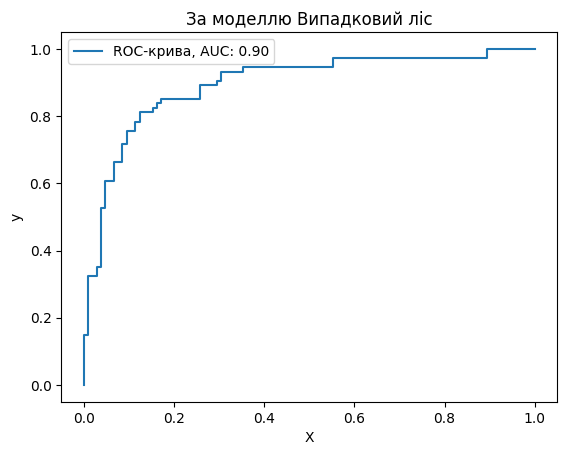

In [127]:
X = titanic_encoded.drop(columns=["survived",'class','who','deck','embark_town','alive'])
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_logistic = LogisticRegression(random_state=42, max_iter=1500)
model_tree = DecisionTreeClassifier(random_state=42)
model_forest = RandomForestClassifier(random_state=42)

model_logistic.fit(X_train, y_train)
model_tree.fit(X_train, y_train)
model_forest.fit(X_train, y_train)

y_logistic_pred = model_logistic.predict(X_test)
y_tree_pred = model_tree.predict(X_test)

forest_params = {
    'n_estimators': [50, 120, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [10, 15],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=model_forest, param_grid=forest_params, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

model_forest = grid_search.best_estimator_
y_forest_pred = model_forest.predict(X_test)

y_logistic_proba = model_logistic.predict_proba(X_test)[:, 1]
y_tree_proba = model_tree.predict_proba(X_test)[:, 1]
y_forest_proba = model_forest.predict_proba(X_test)[:, 1]

fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_logistic_proba)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_tree_proba)
fpr_forest, tpr_forest, _ = roc_curve(y_test, y_forest_proba)

roc_auc_logistic = auc(fpr_logistic, tpr_logistic)
roc_auc_tree = auc(fpr_tree, tpr_tree)
roc_auc_forest = auc(fpr_forest, tpr_forest)

def visualization(model_name, y_pred, fpr, tpr, roc_auc, model):
    print(f'Модель {model_name}')
    print("Точність:", accuracy_score(y_test, y_pred))
    if(model != model_forest):
        print("Перехресна оцінка(точність): ", cross_val_score(model, X, y, cv=5).mean()) #### Перехресна оцінка
    else:
        print("Найкращі параметри для випадкового лісу:", grid_search.best_params_)
    print("Матриця плутанини:\n", confusion_matrix(y_test, y_pred))
    print("Звіт класифікації:\n", classification_report(y_test, y_pred))

    plt.plot(fpr, tpr, label=f'ROC-крива, AUC: {roc_auc:.2f}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'За моделлю {model_name}')
    plt.legend()
    plt.show()

visualization('Логістична регресія', model_logistic.predict(X_test), fpr_logistic, tpr_logistic, roc_auc_logistic, model_logistic)
visualization('Дерево рішень', model_tree.predict(X_test), fpr_tree, tpr_tree, roc_auc_tree, model_tree)
visualization('Випадковий ліс', model_forest.predict(X_test), fpr_forest, tpr_forest, roc_auc_forest, model_forest)

Analyze. The best model is Random Forest cause it shown the highest accuracy value, AUC and others metrics in classification report

Additional[Creative] task. Features ranking by value in classification valuability

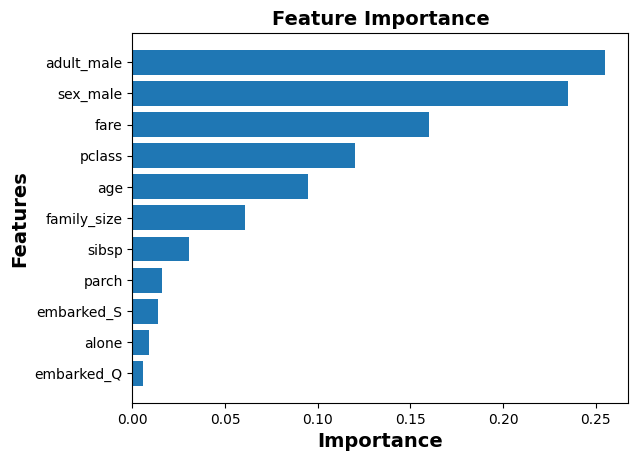

In [129]:
importances = model_forest.feature_importances_
features = numpy.argsort(importances)[::1]

plt.barh(range(X.shape[1]), importances[features], align="center")
plt.yticks(range(X.shape[1]), [X_train.columns[i] for i in features])
plt.ylabel('Features', fontsize=14, weight='bold')
plt.xlabel('Importance', fontsize=14, weight='bold')
plt.title('Feature Importance', fontsize=14, weight='bold')
plt.show()